In [281]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [282]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df = data.copy()

In [283]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [286]:
df.shape

(6167, 136)

In [287]:
df.size

838712

In [288]:
df.isnull().values.any()


False

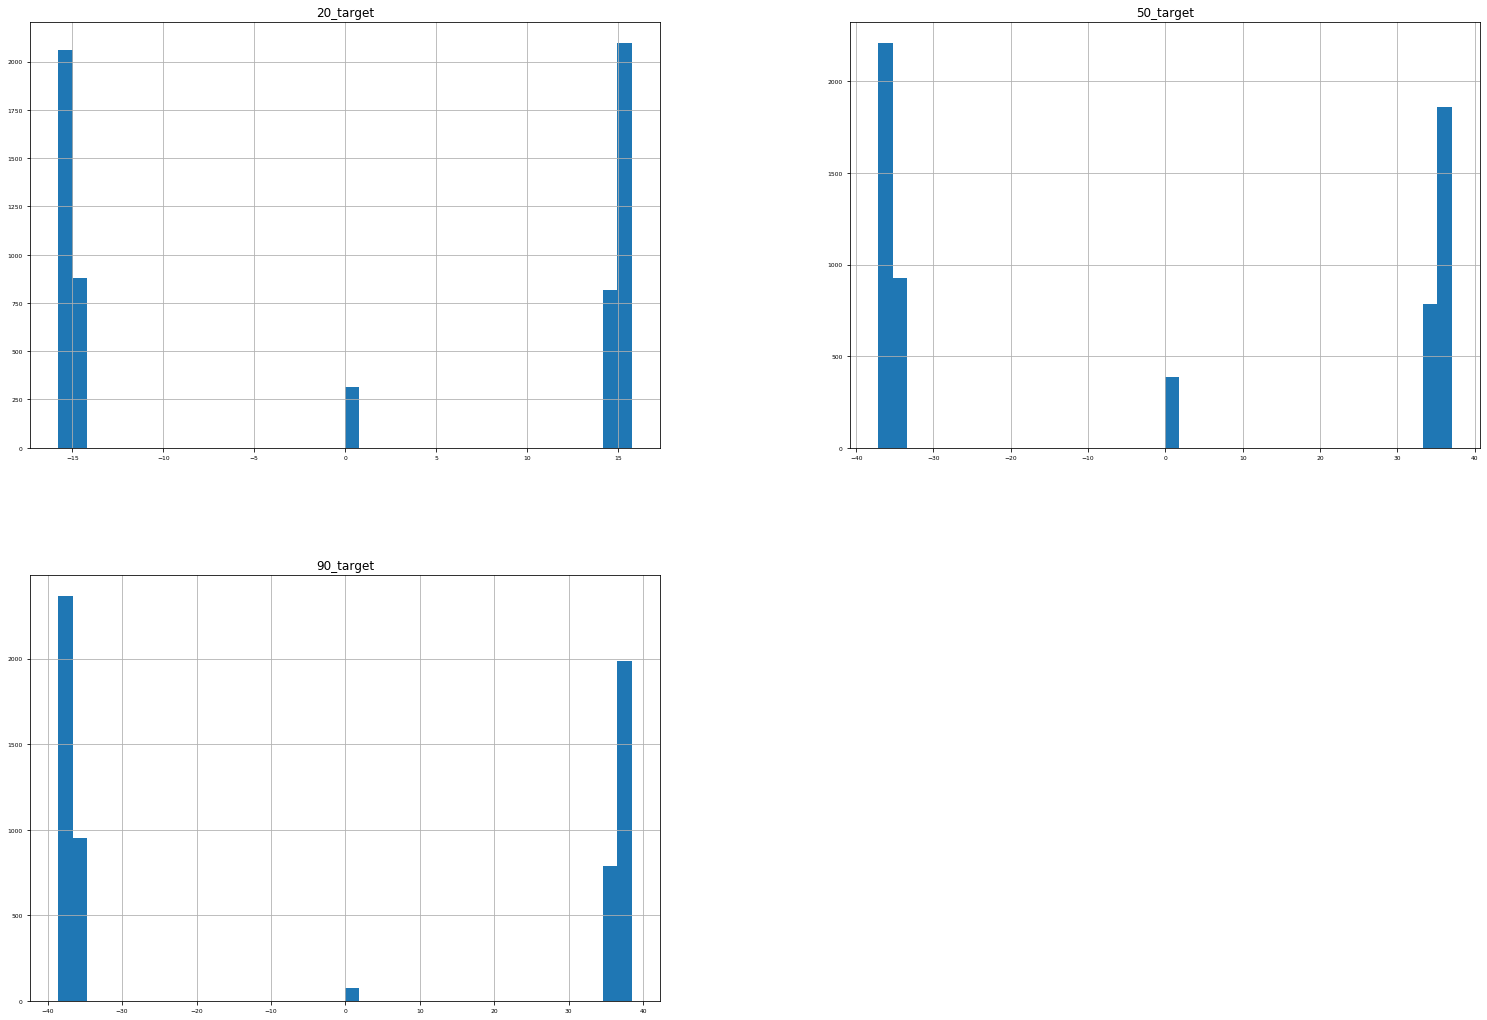

In [289]:
target = ["20_target", "50_target", "90_target"]
df[target].hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6);
# target değişkenlerinin dağılımını incelemek istedim

In [290]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_109', 'ind_420', 'ind_422']

In [291]:
for i in kat_deg:
    print(i,": ",df[i].value_counts().count())

# Kategorik verilerde kaç farklı kategori olduğuna bakıyoruz.
# ind_420 ve ind_422 için 582 ve 573 olmak üzere farklı kategori mevcut olduğu çıkıyor.

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [ ]:
#"ind_109" kategorik değişkeni 2 farklı değer aldığı için dummy ile dönüştürme işlemi uyguladım.

In [292]:
from sklearn.preprocessing import LabelEncoder;

In [293]:
donustur  = LabelEncoder()
donustur.fit(df["ind_109"])
df["ind_109"] = donustur.fit_transform(df["ind_109"])
np.unique(df["ind_109"])

array([0, 1])

In [294]:
dummy = pd.get_dummies(df["ind_109"])
data_dummy = pd.concat([df, dummy],axis=1)
data_dummy = data_dummy.drop(["ind_109"], axis=1)
df = data_dummy

In [295]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_420', 'ind_422']

In [296]:
df["ind_420"] = df["ind_420"].replace("?", np.nan)
df["ind_422"] = df["ind_422"].replace("?", np.nan)
#Icinde "?" bulunan "ind_420" ve "ind_422" değişkenlerindeki ? ini silip none yaptım

In [297]:
df.dropna(how = "all", inplace = True)

In [298]:
df.isnull().sum().sum()

2082

In [299]:
mean1 = df["ind_420"].mean()
mean2 = df["ind_422"].mean()

In [300]:
df["ind_420"] = df["ind_420"].replace(np.nan, mean1, inplace = True)
df["ind_422"] = df["ind_422"].replace(np.nan, mean2, inplace = True)

In [301]:
#normal dağılım mı test et
for i in range (len(df.columns)):
    stat,p = shapiro(df.iloc[:,i])
    if (p>0.05):
        print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")

C:\Users\Seyma Civan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [302]:
# değişkenlerin hiçbiri normal dağılımdan gelmediği için spearman methoduyla korelayson hesaplanıyor
corr = df.corr(method='spearman')
corr

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,0,1
ind_5,1.000000,0.988630,0.572574,-0.558754,0.685817,0.846237,0.846237,-0.015846,-0.025390,-0.030672,...,-0.273709,-0.587714,0.072442,0.640002,0.853830,0.055434,0.059759,0.040774,0.113406,-0.113406
ind_6,0.988630,1.000000,0.536498,-0.514935,0.638785,0.789548,0.789548,-0.006211,-0.017982,-0.026776,...,-0.250663,-0.524228,0.015990,0.574801,0.845404,0.055900,0.060041,0.041227,0.035181,-0.035181
ind_8,0.572574,0.536498,1.000000,-0.362582,0.820571,0.593135,0.593135,0.154778,0.126836,0.031295,...,-0.241175,-0.445836,0.159486,0.584413,0.446803,-0.009657,0.035227,0.018763,0.187736,-0.187736
ind_9,-0.558754,-0.514935,-0.362582,1.000000,-0.819081,-0.615578,-0.615578,0.262169,0.250632,0.158123,...,0.346745,0.590568,-0.184959,-0.619961,-0.454716,-0.041655,-0.020627,0.000702,-0.215359,0.215359
ind_10,0.685817,0.638785,0.820571,-0.819081,1.000000,0.722961,0.722961,-0.067016,-0.077364,-0.076331,...,-0.354236,-0.618614,0.186650,0.748121,0.538290,0.016425,0.031956,0.008842,0.230061,-0.230061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20_target,0.055434,0.055900,-0.009657,-0.041655,0.016425,0.046940,0.046940,-0.014322,-0.008749,0.006783,...,0.006334,-0.033653,-0.005322,0.005617,0.049200,1.000000,0.375573,0.344876,-0.021599,0.021599
50_target,0.059759,0.060041,0.035227,-0.020627,0.031956,0.053429,0.053429,0.062034,0.074178,0.094062,...,0.097630,-0.071471,0.002975,0.012088,0.048863,0.375573,1.000000,0.931766,-0.014422,0.014422
90_target,0.040774,0.041227,0.018763,0.000702,0.008842,0.035024,0.035024,0.069489,0.081218,0.102005,...,0.095250,-0.064370,0.003829,-0.001226,0.035198,0.344876,0.931766,1.000000,-0.011510,0.011510
0,0.113406,0.035181,0.187736,-0.215359,0.230061,0.438781,0.438781,-0.028313,-0.014691,-0.010580,...,-0.128364,-0.415459,0.499175,0.304960,0.174490,-0.021599,-0.014422,-0.011510,1.000000,-1.000000


In [303]:
# 20_target ile korelasyonu en yüksek 10 değişken
a = pd.DataFrame(df[df.columns[:]].corr()["20_target"].abs()[:])
b = a.sort_values(by=['20_target'])
b.tail(11)

,20_target
ind_51,0.070911
ind_36,0.071003
ind_334,0.071096
ind_50,0.071823
ind_70,0.072131
ind_130,0.079174
ind_332,0.089679
ind_37,0.089695
90_target,0.355950
50_target,0.384076


In [304]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_420', 'ind_422']

In [305]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

In [306]:
selected_columns = df[num_deg].columns[columns]
df = df[selected_columns]

In [307]:
df.shape

(6167, 47)

In [314]:
#normal dağılım mı test et
for i in range (len(df.columns)):
    stat,p = shapiro(df.iloc[:,i])
    if (p>0.05):
        print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")

C:\Users\Seyma Civan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


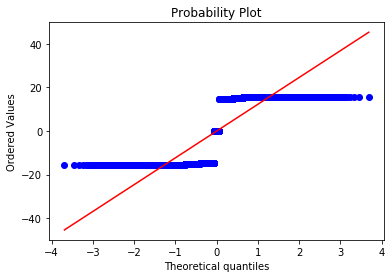

In [309]:
stats.probplot(df["20_target"], dist="norm", plot=pylab)   #normal dağılım mı ?
pylab.show()

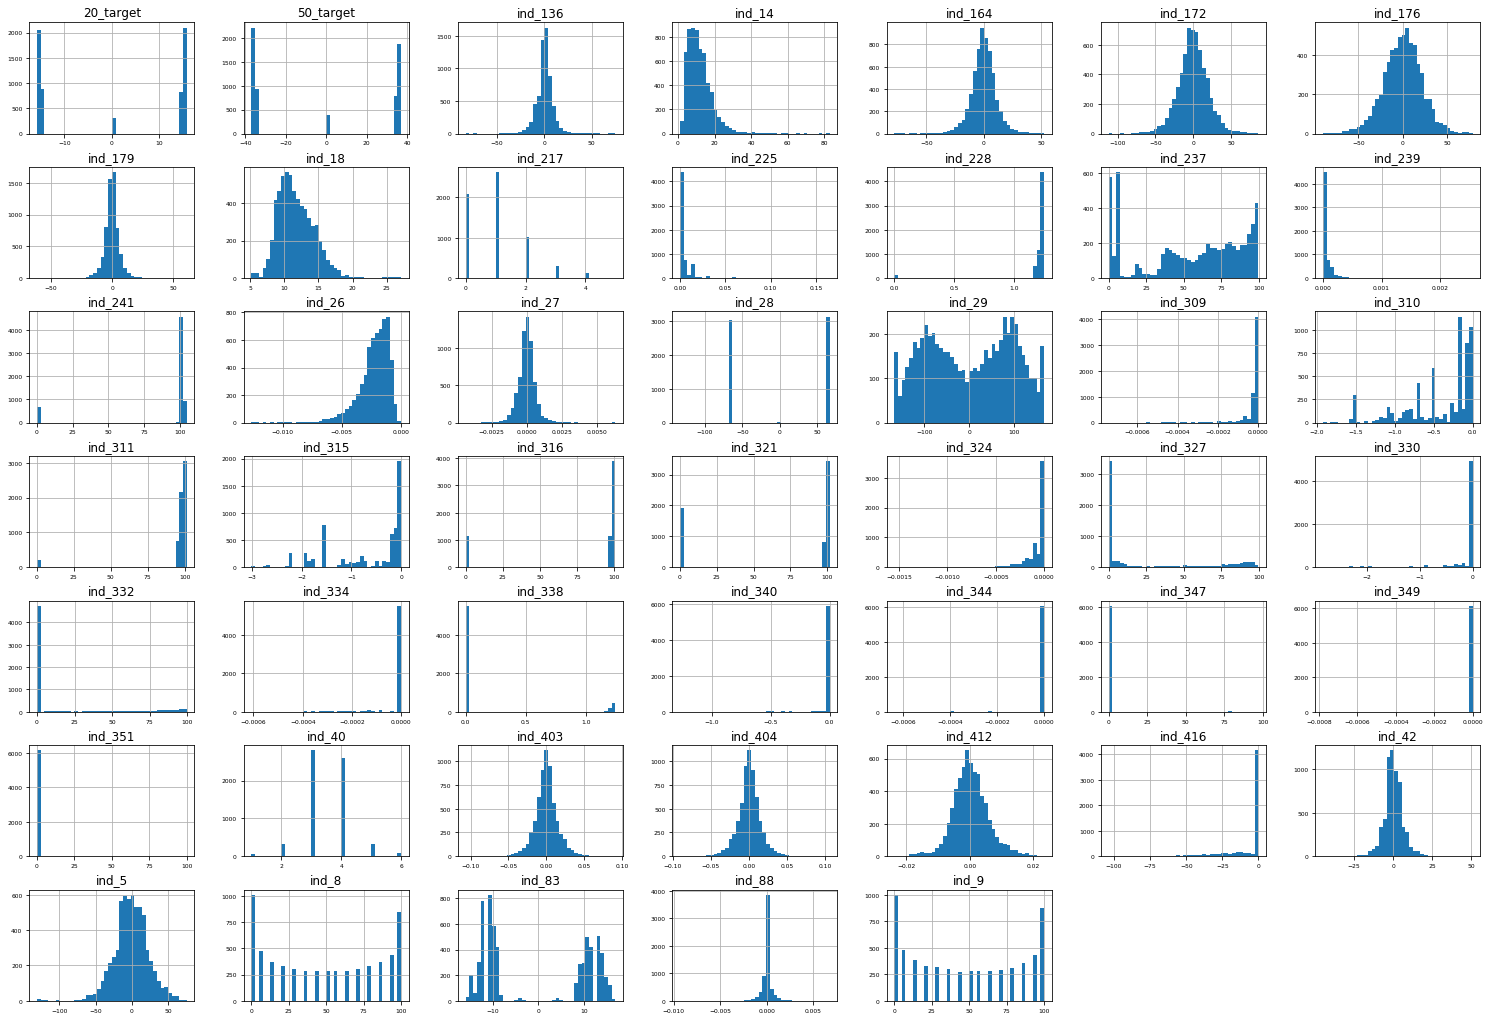

In [310]:
#diğer değişkenler normal dağılımdan  mı geliyor ?
df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

In [311]:
# MULTİPLE LİNEAR REGRESSİON
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

df = df.copy()
x_df = df.drop(["20_target"], axis=1)
y_df  = df["20_target"]

x_train, x_test, y_train, y_test = train_test_split(x_df,y_df, test_size=0.2, random_state=42)

In [312]:
x_train.shape, y_train.shape, x_test.shape, x_test.shape


((4933, 46), (4933,), (1234, 46), (1234, 46))

In [313]:
lm = sm.OLS(y_train, np.asarray(x_train))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              20_target   R-squared (uncentered):                   0.171
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              21.97
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                   1.62e-163
Time:                        17:36:57   Log-Likelihood:                         -19845.
No. Observations:                4933   AIC:                                  3.978e+04
Df Residuals:                    4887   BIC:                                  4.008e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0042      0.018     -0.231      0.817      -0.040       0.031
x2            -0.0126      0.007     -1.720      0.086      -0.027       0.002
x3            -0.0140      0.008     -1.842      0.066      -0.029       0.001
x4             0.0248      0.040      0.621      0.535      -0.053       0.103
x5            -0.0652      0.092     -0.709      0.478      -0.245       0.115
x6           284.6501    219.748      1.295      0.195    -146.154     715.454
x7          -756.1479    480.349     -1.574      0.116   -1697.849     185.553
x8            -0.0003      0.004     -0.066      0.947      -0.009       0.008
x9            -0.0064      0.004     -1.753      0.080      -0.013       0.001
x10            0.4450      0.312      1.426      0.154      -0.167       1.057
x11           -0.0995      0.098     -1.013      0.311      -0.292       0.093
x12            0.0520      0.022      2.329      0.020       0.008       0.096
x13          176.3248    399.019      0.442      0.659    -605.933     958.582
x14           -0.0428      0.066     -0.648      0.517      -0.172       0.087
x15            0.0027      0.035      0.078      0.938      -0.066       0.071
x16            0.0244      0.012      2.108      0.035       0.002       0.047
x17           -0.0048      0.011     -0.422      0.673      -0.027       0.017
x18           -0.0115      0.046     -0.252      0.801      -0.101       0.078
x19            0.1917      0.234      0.820      0.412      -0.266       0.650
x20          -10.3737     21.265     -0.488      0.626     -52.062      31.315
x21            1.9719      1.288      1.531      0.126      -0.553       4.497
x22            0.0116      0.007      1.562      0.118      -0.003       0.026
x23        -4729.0978   1735.833     -2.724      0.006   -8132.111   -1326.085
x24            0.0015      0.010      0.160      0.873      -0.017       0.020
x25        -3765.1161   3604.407     -1.045      0.296   -1.08e+04    3301.142
x26           -0.4116      0.509     -0.809      0.418      -1.409       0.586
x27           -0.0366      0.012     -3.121      0.002      -0.060      -0.014
x28            0.1638      0.329      0.498      0.618      -0.481       0.808
x29            0.0176      0.008      2.178      0.029       0.002       0.034
x30           -0.0054      0.007     -0.786      0.432      -0.019       0.008
x31          323.7457   2117.705      0.153      0.879   -3827.908    4475.400
x32           -0.0022      0.008     -0.292      0.770      -0.017       0.013
x33            1.3750      0.763      1.802      0.072      -0.121       2.871
x34            0.0311      0.011      2.926      0.003       0.010       0.052
x35        -1.784e+04   5694.625     -3.133      0.002    -2.